# Task 3: finding a legisign relationship according to my theory

My theory derives from different components of the Circuit of Culture, where multiple complex contagions might be at play. Here, I concentrate on the Identity part. As explained, the ever-changing cultural beliefs and values could contribute to the heterogeneity of Billboard Hot 100 songs from 1950 to 2015. More specifically, I further narrow my focus on the romance ideology and how it relates to the theme of the song lyrics of these popular songs. The idea is: more focus on committed romantic relationships on a societal level may be related to more hopeless romantic singers. I further operationalize both notions as marriage rates and the salience of hopeless romantics in songs. My hypothesis is: the salience of love themes in Billboard Hot 100 songs is positively correlated with the marital state in the US.

Method
I first obtained an open-sourced dataset of the marriage rate per 1,000 of the population in the United States from 1990 to 2020 (Statista, 2022). Then, I computed the weight of five salient topics of the Billboard Hot 100 songs with the LDA (Latent Dirichlet Allocation) approach. 

Through a qualitative analysis of the 10 songs most saliently belonging to Topic 3, I conclude that Topic 3 is most relevant to heartbreaks and longing for the lover, where lyrics like “why your love went away” (What Goes Around Comes Around), “maybe you’ll let me borrow your heart” (Not A Bad Thing), “Still need her” (Red Red Wine) appear. Therefore, I refer to Topic 3 as the romance/heartbreak theme.

I obtained the average weight scores of the romance/heartbreak theme for each year. Two datasets were assembled into one that covers the years from 1990 to 2015. Lastly, I tested my hypothesis of the positive correlation between the salience of the romance/heartbreak theme in Billboard Hot 100 songs and marriage rate from 1990 to 2015 with OLS (Ordinary Least Squares) regression.

# Task 4: testing my proposed legisign relationship

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora, models
import statsmodels.api as sm
from statsmodels.formula.api import ols
import music        # ref: week6 hands-on files
import utils        # stores the helper function

In [3]:
music_df = pd.read_csv('data/music_df.csv')

In [4]:
print(music_df.columns)
music_df.head()

Index(['lyrics', 'num_syllables', 'pos', 'year', 'fog_index', 'flesch_index',
       'num_words', 'num_lines', 'title', 'f_k_grade', 'artist',
       'difficult_words', 'num_dupes', 'neg', 'neu', 'compound', 'id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'uri', 'analysis_url',
       'artist_with_features', 'year_bin', 'image', 'cluster', 'Gender'],
      dtype='object')


,lyrics,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,title,f_k_grade,...,tempo,duration_ms,time_signature,uri,analysis_url,artist_with_features,year_bin,image,cluster,Gender
0,"Mona Lisa, Mona Lisa, men have named you\nYou'...",189.0,0.199,1950,5.2,88.74,145,17,Mona Lisa,2.9,...,86.198,207573.0,3,spotify:track:3k5ycyXX5qsCjLd7R2vphp,https://api.spotify.com/v1/audio-analysis/3k5y...,NaN,50s,https://i.scdn.co/image/a4c0918f13b67aa8d9f4ea...,String Lover,male
1,I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...,270.9,0.224,1950,4.4,82.31,189,31,I Wanna Be Loved,3.3,...,170.869,198027.0,5,spotify:track:4UY81WrDU3jTROGaKuz4uZ,https://api.spotify.com/v1/audio-analysis/4UY8...,Gordon Jenkins,50s,https://i.scdn.co/image/42e4dc3ab9b190056a1ca1...,String Lover,Group
2,I was dancing with my darling to the Tennessee...,174.6,0.351,1950,5.2,88.74,138,16,Tennessee Waltz,2.9,...,86.335,182733.0,3,spotify:track:6DKt9vMnMN0HmlnK3EAHRQ,https://api.spotify.com/v1/audio-analysis/6DKt...,NaN,50s,https://i.scdn.co/image/353b05113b1a140d64d83d...,String Lover,female
3,Each time I hold someone new\nMy arms grow col...,135.9,0.231,1950,4.4,99.23,117,18,I'll Never Be Free,0.9,...,82.184,158000.0,3,spotify:track:0KnD456yC5JuweN932Ems3,https://api.spotify.com/v1/audio-analysis/0KnD...,Kay Starr,50s,https://i.scdn.co/image/4bd427bb9181914d0fa448...,String Lover,male
4,"Unfortunately, we are not licensed to display ...",46.8,0.079,1950,6.0,69.79,32,3,All My Love,6.0,...,123.314,190933.0,4,spotify:track:05sXHTLqIpwywbpui1JT4o,https://api.spotify.com/v1/audio-analysis/05sX...,NaN,50s,https://i.scdn.co/image/353b05113b1a140d64d83d...,String Lover,female


--------------------

In [5]:
# create a variable to access lyrics of the songs
lyrics = music_df['lyrics']

In [6]:
# Get lemma series

#lemmas = music_df['lyrics'].apply(music.get_lemmas)
#lemmas.to_pickle('lyric_lemmas.pkl')

lemmas = pd.read_pickle('lyric_lemmas.pkl')

In [7]:
# Take a look at the first couple of words in the song:
lemmas[0][:10]

['mona',
 'lisa',
 'mona',
 'lisa',
 'men',
 'name',
 "'re",
 'like',
 'lady',
 'mystic']

use [colocation detection algorithms](https://radimrehurek.com/gensim/models/phrases.html) in Gensim to identify bigrams

In [8]:
lemmas = music.make_bigrams(lemmas)
lemmas[0][:20]

['mona_lisa',
 'mona_lisa',
 'men',
 'name',
 "'re",
 'like',
 'lady',
 'mystic',
 'smile',
 "'cause",
 "'re",
 'lonely',
 'blame',
 'mona_lisa',
 'strangeness',
 'smile_smile',
 'tempt',
 'lover',
 'mona_lisa',
 'way']

Identify topics with [LDA](https://radimrehurek.com/gensim/models/ldamodel.html) approach with Gensim

In [9]:
# initialize series of lemmas as Gensim Dictionary
dictionary = corpora.Dictionary(lemmas)

# convert dictionary into list of (token_id, token_count) tuples
bow_corpus = [dictionary.doc2bow(text) for text in lemmas]

Using the measure ["topic coherence"](https://radimrehurek.com/gensim/models/coherencemodel.html) to identify the number of topics as priori for LDA

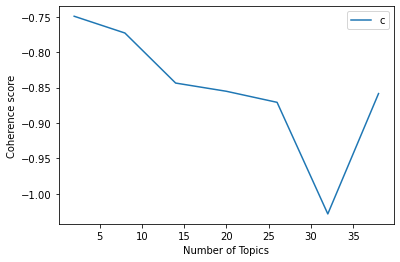

In [ ]:
model_list, coherence_values = music.compute_coherence_values(dictionary=dictionary,
                                                              corpus=bow_corpus,
                                                              texts=lemmas,
                                                              start=2,
                                                              limit=40,
                                                              step=6)
plt.plot(range(2, 40, 6), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');

In [22]:
# Fit optimal LDA Model based on bag of words counts for each token and return weights:
#ldamodel = models.ldamulticore.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, workers=8, passes=20, iterations=400)
# For single-core processing:
#ldamodel = models.ldamodel.LdaModel(bow_corpus, num_topics = 5, id2word=dictionary, passes=20, iterations=400)

#ldamodel.save('lda5p20_i400.model')
ldamodel = models.ldamodel.LdaModel.load('lda5p20_i400.model')
topics = ldamodel.print_topics(num_words=20)

for topic in topics:
    print(topic)

(0, '0.027*"\'m" + 0.025*"na" + 0.022*"get" + 0.021*"\'s" + 0.019*"n\'t" + 0.014*"yeah" + 0.013*"oh" + 0.011*"come" + 0.010*"want" + 0.009*"like" + 0.009*"know" + 0.009*"ca_n\'t" + 0.008*"go" + 0.008*"say" + 0.008*"good" + 0.007*"well" + 0.007*"one" + 0.007*"\'re" + 0.007*"\'ve" + 0.006*"man"')
(1, '0.035*"\'s" + 0.032*"get" + 0.019*"like" + 0.018*"\'m" + 0.011*"n\'t" + 0.011*"let" + 0.010*"yeah" + 0.009*"know" + 0.009*"go" + 0.008*"come" + 0.007*"make" + 0.007*"see" + 0.007*"wan_na" + 0.007*"back" + 0.006*"ai_n\'t" + 0.006*"girl" + 0.006*"right" + 0.006*"\'re" + 0.006*"night" + 0.006*"say"')
(2, '0.023*"yeah" + 0.021*"get" + 0.019*"\'s" + 0.019*"go" + 0.017*"oh" + 0.017*"baby" + 0.014*"know" + 0.011*"say" + 0.010*"girl" + 0.009*"\'ll" + 0.009*"\'m" + 0.009*"like" + 0.009*"come" + 0.008*"n\'t" + 0.008*"’" + 0.007*"well" + 0.007*"take" + 0.006*"tell" + 0.006*"one" + 0.006*"let"')
(3, '0.040*"love" + 0.029*"\'s" + 0.023*"n\'t" + 0.019*"know" + 0.018*"baby" + 0.017*"\'m" + 0.015*"\'re" + 

In [23]:
top_songs_by_topic = music.top_songs_by_topic(music_df, ldamodel, bow_corpus, ntop=10)

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/jiayan/opt/anaconda3/envs/macs40400/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/jiayan/opt/anaconda3/envs/macs40400/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
_pickle.UnpicklingError: pickle data was truncated


Topic 0
                          title  year           artist
3203                  Rich Girl  2005     Gwen Stefani
1540                 Centerfold  1982    J. Geils Band
2895                   Survivor  2001  Destiny's Child
3652                        S&M  2011          Rihanna
2087                 On Our Own  1989      Bobby Brown
2513  Here Comes The Hotstepper  1995       Ini Kamoze
2487  Here Comes The Hotstepper  1994       Ini Kamoze
3589                Ridin' Solo  2010     Jason Derulo
3137                 Sorry 2004  2004   Ruben Studdard
2399                   Bad Boys  1993     Inner Circle
*******************************
Topic 1
                    title  year                artist
2553     1st Of Tha Month  1995  Bone Thugs-N-Harmony
2847  The Real Slim Shady  2000                Eminem
2806        Ghetto Cowboy  1999       Mo Thugs Family
2726              Victory  1998            Puff Daddy
3260               Ridin'  2006        Chamillionaire
3991                 On

From the information above, Topic 3 can presumably be summarised as missing lovers. To have a better grasp of it, we could take a look at the lyrics of the top songs in Topic 3.

In [14]:
# list of indices of songs in Topic 3
top_songs_by_topic[3]

[3344, 3912, 2026, 2713, 2282, 2024, 2436, 2546, 2986, 1126]

In [20]:
topic3_exp = pd.DataFrame(columns=["title", "lyrics"])

for i in top_songs_by_topic[3]:
    topic3_exp.loc[len(topic3_exp)] = [music_df.loc[i]["title"], music_df.loc[i]["lyrics"]]

# browse the top songs of Topic 3 and summarise the theme
pd.options.display.max_colwidth = 300
topic3_exp.head(10)

,title,lyrics
0,What Goes Around Comes Around,"Hey girl\nIs he everything you wanted in a man?\nYou know I gave you the world\nYou had me in the palm of your hand\n\nSo why your love went away\nI just can't seem to understand\nThought it was me and you, baby\nMe and you until the end\nBut I guess I was wrong\n\nDon't want to think about it\n..."
1,Not A Bad Thing,"Said all I want from you is to see you tomorrow\nAnd every tomorrow, maybe you’ll let me borrow your heart\nAnd is it too much to ask for every Sunday\nIf I were radical and every other day to start\n\nI know people make promises all the time\nThen they turn right around and break them\nWhen som..."
2,Red Red Wine,"Red, red wine\nGoes to my head\nMakes me forget that I\nStill need her so\n\nRed, red wine\nIt's up to you\nAll I can do I've done\nMemories won't go\nMemories won't go\n\nI'd have sworn that with time\nThoughts of you would leave my head\nI was wrong, now I find\nJust one thing makes me forget\..."
3,Never Ever,Nicole:\nA few questions that I need to know\nHow you could ever hurt me so\nI need to know what I've done wrong\nAnd how long it's been going on\nWas it that I never paid enough attention?\nOr did I not give enough affection?\nNot only will your answers keep me sane\nBut I'll know never to make...
4,End Of The Road,"Spoken:\nGirl you know we belong together.\nI don't have no time for you to be playing with my heart like this.\nYou'll be mine forever baby, you just see.\n\nWe belong together and you know that I'm right\nWhy do you play with my heart, why do you play with my mind\nSaid we'd be forever, said i..."
5,The Way You Make Me Feel,"(Hee! - hee!)\n(Ooh!)\n(Go on girl!)\n(Aaow!)\n\nHey pretty baby with the high heels on\nYou give me fever\nLike I've never, forever known\nYou're just a product of loveliness\nI like the groove of your walk\nYour talk, your dress\nI feel your fever\nFrom miles around\nI'll pick you up in my car..."
6,You Mean The World To Me,"If you could give me one good reason why I should believe you,\nBelieve in all the things that you tell...\nI would sure like to believe you, my heart wants to receive you;\nJust make me know that you are sincere...\n\nYou know I'd love for you to lead me, and follow through completely,\nSo won'..."
7,Every Day Of The Week,"Mmm, mmm, mmm\nOoh...whoa...oh...oh...oh...\nOh, yeah\n\nYou were lookin' so good to me\nThe night we met, I could not see\nHow deep you were to penetrate my heart, mmm\nNow that some time has passed\nIt made me think this was meant to last\nI never wanna be apart, oh, no, no\n\nDon't let me foo..."
8,Rainy Dayz,"Hey, yeah\nRule baby, yeah\nMary J. Blige\nMurder Inc.\nSmile\n\nIt's just those rainy days\nSpend a lifetime, tryin' to wash away\nUntil the sun comes out and shines again\nSmile for me, smile for me\n\nAll of those rainy days\nSpend your lifetime, tryin' to wash away\nUntil the sun shines and ..."
9,Love Rollercoaster,"Rollercoaster, of love (Say what?)\nRollercoaster, (huh huh)\nOoh, ooh, ooh, ooh\nRollercoaster (ride), of love\nRollercoaster (heh, heh, heh, heh)\nOoh, ooh, ooh, ooh\n\nRollercoaster (love rollercoaster) of love\n(Yeah) Rollercoaster (wow, wow, wow, high)\nOoh, ooh, ooh, ooh\nRollercoaster of ..."


From the lyrics presented above, we could tell that Topic 3 relates closedly to heartbreaks/longing for someone's love, or as described by Prof. Clindaniel, "pleading or begging partner to take you back, forgive you, etc."

In [37]:
# apply to each row: axis=1, args=[bow_corpus] (see function above)
music_df = music_df.apply(music.fill_topic_weights,
                          axis=1, args=[bow_corpus, ldamodel]).fillna(0)
music_df.head()

,0,1,2,3,4,Gender,acousticness,analysis_url,artist,artist_with_features,...,num_words,pos,speechiness,tempo,time_signature,title,uri,valence,year,year_bin
0,0.000000,0.336013,0.000000,0.653405,0.000000,male,0.903,https://api.spotify.com/v1/audio-analysis/3k5y...,Nat King Cole,0,...,145,0.199,0.0325,86.198,3,Mona Lisa,spotify:track:3k5ycyXX5qsCjLd7R2vphp,0.339,1950,1950s
1,0.000000,0.411736,0.000000,0.582746,0.000000,Group,0.939,https://api.spotify.com/v1/audio-analysis/4UY8...,Andrews Sisters,Gordon Jenkins,...,189,0.224,0.0389,170.869,5,I Wanna Be Loved,spotify:track:4UY81WrDU3jTROGaKuz4uZ,0.181,1950,1950s
2,0.000000,0.398283,0.000000,0.590973,0.000000,female,0.784,https://api.spotify.com/v1/audio-analysis/6DKt...,Patti Page,0,...,138,0.351,0.0276,86.335,3,Tennessee Waltz,spotify:track:6DKt9vMnMN0HmlnK3EAHRQ,0.294,1950,1950s
3,0.000000,0.000000,0.000000,0.986213,0.000000,male,0.780,https://api.spotify.com/v1/audio-analysis/0KnD...,Tennessee Ernie Ford,Kay Starr,...,117,0.231,0.0357,82.184,3,I'll Never Be Free,spotify:track:0KnD456yC5JuweN932Ems3,0.474,1950,1950s
4,0.014488,0.014483,0.014453,0.014483,0.942093,female,0.801,https://api.spotify.com/v1/audio-analysis/05sX...,Patti Page,0,...,32,0.079,0.0408,123.314,4,All My Love,spotify:track:05sXHTLqIpwywbpui1JT4o,0.633,1950,1950s


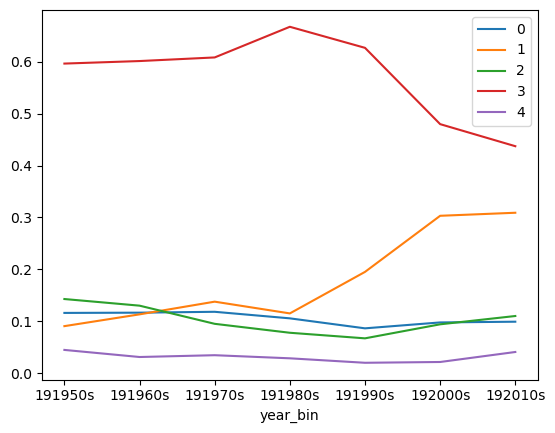

In [38]:
# clean up the `year_bin` category as I did in Part I
music_df['year_bin'] = music_df['year_bin'].apply(lambda x: '20'+x if (x == '10s') or (x == '00s') else '19'+x)

# look at the general tendency of topics over the years
music_df[['0','1','2','3','4','year_bin']].groupby('year_bin').mean().plot();

In [68]:
topic3_df = music_df[['3','year']].groupby('year', as_index=False).mean()

# Topic 3 contains the weight of heartbreaks/pleading for love
topic3_df.columns = ['year', 'heartbreak_theme']      
topic3_df.head()

,year,heartbreak_theme
0,1950,0.568010
1,1951,0.577869
2,1952,0.484377
3,1953,0.639786
4,1954,0.570879


In [45]:
# read the dataset containing marriage rates
df_marriage = pd.read_csv("data/marriage rate.csv", header=None)
df_marriage.columns = ["year", "marriage_rate"]
df_marriage.head()

,year,marriage_rate
0,'90,9.8
1,'91,9.4
2,'92,9.3
3,'93,9.0
4,'94,9.1


In [46]:
# clean up the year column
df_marriage['year'] = df_marriage['year'].apply(lambda x: str(x)[1:3])\
    .apply(lambda x: '20'+x 
           if (x.startswith('2') or x.startswith('1') or x.startswith('0')) 
           else '19'+x)\
    .apply(lambda x: int(x))
df_marriage.head()

,year,marriage_rate
0,1990,9.8
1,1991,9.4
2,1992,9.3
3,1993,9.0
4,1994,9.1


In [69]:
# merge the two datasets
df = pd.merge(left=topic3_df, right=df_marriage, on="year")
df.head()

,year,heartbreak_theme,marriage_rate
0,1990,0.656008,9.8
1,1991,0.709713,9.4
2,1992,0.645286,9.3
3,1993,0.638256,9.0
4,1994,0.624786,9.1


                            OLS Regression Results                            
Dep. Variable:       heartbreak_theme   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     67.35
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           2.00e-08
Time:                        15:26:00   Log-Likelihood:                 41.754
No. Observations:                  26   AIC:                            -79.51
Df Residuals:                      24   BIC:                            -76.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2506      2.647      8.406      0.0

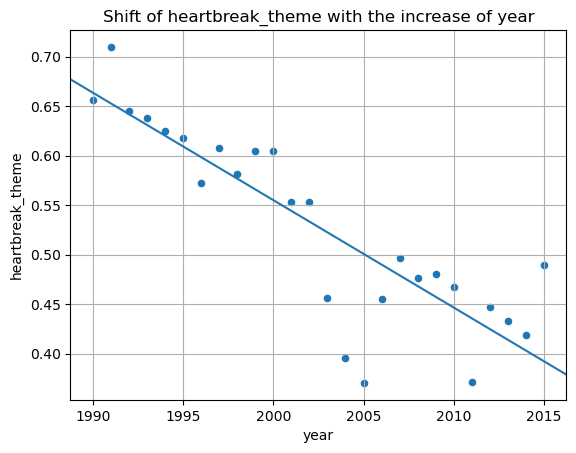

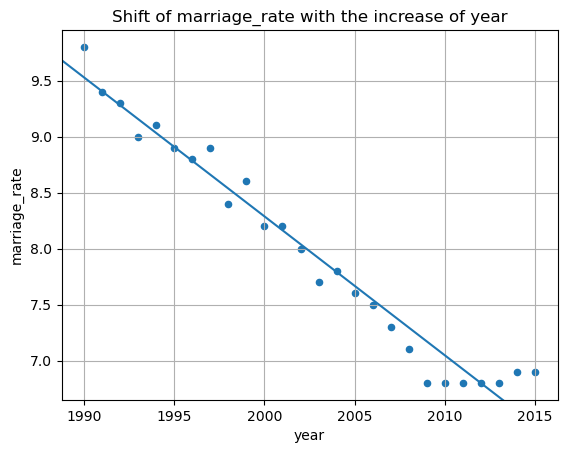

In [70]:
utils.ols_summary_plot('heartbreak_theme', 'year', df)
utils.ols_summary_plot('marriage_rate', 'year', df)

                            OLS Regression Results                            
Dep. Variable:       heartbreak_theme   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     76.44
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.33e-09
Time:                        15:26:12   Log-Likelihood:                 42.986
No. Observations:                  26   AIC:                            -81.97
Df Residuals:                      24   BIC:                            -79.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1671      0.080     -2.088

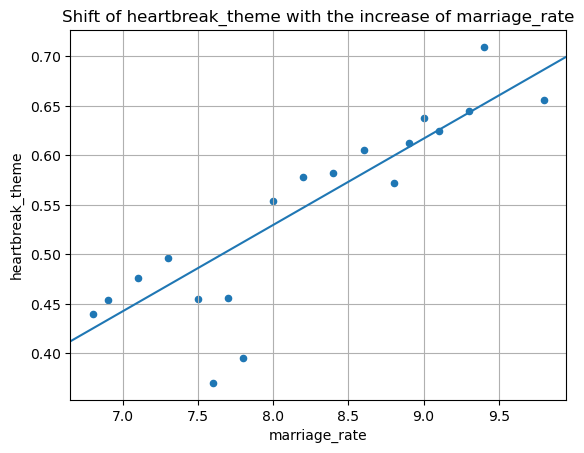

In [71]:
utils.ols_summary_plot('heartbreak_theme', 'marriage_rate', df)

# Task 5: explaining how the results support my theory

Results
Identifying the relationship between the weight of the romance/heartbreak theme and marriage rate affords insights into how the texts of lyrics carry arguments and values that directly link to the Identity part in the Circuit of Culture (Du Gay et al., 2013).

Preliminarily, I tested the relations between the salience of the romance/heartbreak theme and year and marriage rate and year separately. The regression model of topic weight accounts for 73.7% of the variance of the data while the one of marriage rate accounts for 96.1%. Both results show a significant negative correlation, which means both the salience of the romance/heartbreak theme in Billboard songs and the marriage rate has seen a significant decrease from 1990 to 2015. Is the salience of the romance/heartbreak theme related to the marriage rate? I then explored the relation of the romance/heartbreak theme’s weight scores with marriage rates over 26 years. The results show a significant positive correlation between the two, which corroborates my hypothesis that less salience of the romance/heartbreak theme in Billboard Hot 100 songs is related to a lower marriage rate in the US from 1990 to 2015. 

Though no causal relationships can be inferred from my analysis, the results show a possible contribution of people’s commitment to love to the change in song lyrics. With people being less interested in getting married and possibly in romantic commitment in general, the songs on the Billboard Hot 100 chart also show less interest in the theme of love and heartbreaks over the years. The result is consistent with the raised theory that shifts in cultural identity played a role in the heterogenization of popular songs. Further research is needed to explore other relations within the Circuit of Culture (Du Gay et al., 2013), for example, how word-of-mouth regulates the music market now and how it has changed over the years.

*Reference*

Christenson, P., Roberts, D. F., & Bjork, N. (2012). Booze, Drugs, and Pop Music: Trends in Substance Portrayals in the Billboard Top 100—1968–2008. Substance Use & Misuse, 47(2), 121–129. https://doi.org/10.3109/10826084.2012.637433

Du Gay, P., Hall, S., Janes, L., Madsen, A. K., Mackay, H., & Negus, K. (2013). Doing cultural studies: The story of the Sony Walkman, 2nd edition. Sage Publications: London.

Frith, S. (1996). Songs as Texts. In Performing Rites: On the Value of Popular Music. Cambridge, MA: Harvard University Press, pp. 158–182.

Guilbeault, D., Becker, J., & Centola, D. (2018). Complex Contagions: A Decade in Review. In S. Lehmann & Y.-Y. Ahn (Eds.), Complex Spreading Phenomena in Social Systems (pp. 3–25). Springer International Publishing. https://doi.org/10.1007/978-3-319-77332-2_1

Roessner, S. (2017, October 8). The Beat Goes Static: A Tempo Analysis of U.S. Billboard Hot 100 #1 Songs from 1955–2015. Audio Engineering Society Convention 143. https://www.aes.org/e-lib/browse.cfm?elib=19246

Statista (2022). USA - Marriage rate 1990-2020 [Dataset]. https://www.statista.com/statistics/195951/marriage-rate-in-the-united-states-since-1990/
